# KAGGLE-LIKE CHALLENGE
On vous propose ici de tester tout ce que vous avez appris sur le machine learning supervisé, dans le but de faire un modèle de prédiction sur des données fournies, à la manière des compétitions Kaggle.

**Déroulement d'un challenge Kaggle**
- Kaggle vous envoie toujours deux datasets :
  - un fichier data_train.csv qui contient des données correspondant aux variables X, et au label Y à prédire. Utilisez ce fichier pour entraîner vos modèles comme d'habitude.
  - un fichier data_test.csv, qui contient les données X au même format que dans data_train.csv, mais cette fois les labels sont cachés. Votre but est de faire des prédictions sur ces données et de renvoyer ces prédictions à Kaggle, pour qu'ils évaluent votre modèle de manière indépendante
- Kaggle compare vos prédictions aux vrais labels et propose un leaderboard (équipes classées en fonction de leur score)
- Kaggle vous annonce à l'avance quelle métrique va être utilisée pour évaluer les modèles : veillez à utiliser la même métrique pour évaluer les performances de vos modèles

**Prédiction de conversion**

Ici, on vous propose d'essayer de créer le meilleur modèle pour prédire des conversions en fonction de différentes variables explicatives. Vos modèles seront évalués à l'aide du f1-score.

*Inspirez-vous du template ci-dessous pour la lecture des fichiers, la structure à suivre, et l'écriture des prédictions finales.*

In [141]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# feature number of page visited
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score
# featuures numeriques uniquement
# algo logistic regression CV


# Read file with labels

In [142]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [143]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [144]:



data.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000








# Explore dataset

In [145]:
data.corr()
#target =converted
#principale correlation entre features numeriques et target :'total_pages_visited'

,age,new_user,total_pages_visited,converted
age,1.000000,0.011676,-0.045365,-0.088265
new_user,0.011676,1.000000,-0.082986,-0.152115
total_pages_visited,-0.045365,-0.082986,1.000000,0.529192
converted,-0.088265,-0.152115,0.529192,1.000000


In [146]:
data.shape

(284580, 6)

In [147]:

data

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [148]:



data.info()
# features numeriques age,new user,total pages visited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


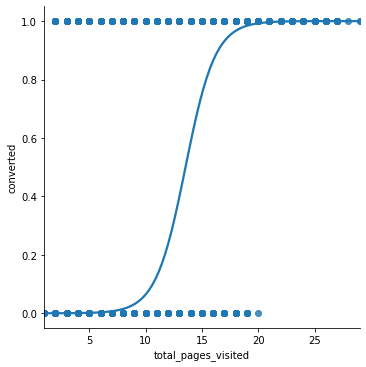

In [14]:





# Don't forget to compute statistics and visualize your data
sns.lmplot(x="total_pages_visited",y="converted",data=data,logistic=True)

In [149]:
# les conversions 
print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Percentage of missing values: 


country                0.0
age                    0.0
new_user               0.0
source                 0.0
total_pages_visited    0.0
converted              0.0
dtype: float64

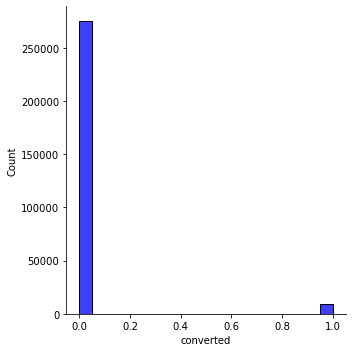

In [153]:
sns.displot(data['converted'],color="b")
#la classe 0 est surreprésentee 97%

# Make your model (as always)

## Choose variables to use in the model, and create train and test sets

In [156]:
#features_list =
feature_list_1=['age','new_user','total_pages_visited']
numeric_indices = [1,2,4]
categorical_indices = []
target_variable = 'converted'

In [157]:
sumconv=data['converted'].sum()
sumconv
#total des conversions

9180

In [164]:
#pourcentage de converted dans le dataset "train+test"
tauxconvert=sumconv/data.shape[0]
tauxconvert
print ( "{:0.00%}".format(tauxconvert))

3%


In [73]:

X= data.loc[:,feature_list_1]
Y = data.loc[:, target_variable]


print('Variables explicatives : ', X.columns)
print(Y)
print()
print(X)

Variables explicatives :  Index(['age', 'new_user', 'total_pages_visited'], dtype='object')
0         0
1         0
2         1
3         0
4         0
         ..
284575    0
284576    0
284577    0
284578    0
284579    0
Name: converted, Length: 284580, dtype: int64

        age  new_user  total_pages_visited
0        22         1                    2
1        21         1                    3
2        20         0                   14
3        23         1                    3
4        28         1                    3
...     ...       ...                  ...
284575   36         1                    1
284576   31         1                    2
284577   41         1                    5
284578   31         1                    4
284579   26         0                    3

[284580 rows x 3 columns]


In [74]:
# Divide dataset Train set & Test set 
#equilibrage des classes sur les echantillons cibles 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0,stratify=Y)

print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [75]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[23  0  2]
 [28  0  2]
 [30  1  7]
 [37  1  3]
 [31  1  8]]
[[24  1 14]
 [35  0  5]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [76]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

featureencoder = StandardScaler()
X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.91458053 -1.4767432  -0.85939501]
 [-0.30994956 -1.4767432  -0.85939501]
 [-0.06809718  0.67716581  0.63639894]
 [ 0.77838618  0.67716581 -0.56023622]
 [ 0.05282902  0.67716581  0.93555773]]


In [77]:
type(X_train)

numpy.ndarray

In [78]:
# Train model
print("Train model...")
classifier = LogisticRegressionCV() # regularized logit with regularization strength chosen by cross-val

classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [79]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]




## Test pipeline

In [80]:
# Use X_test, and the same preprocessings as in training pipeline, 
# but call "transform()" instead of "fit_transform" methods (see example below)

print("Encoding standardizing numerical features...")

X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])

Encoding standardizing numerical features...
...Done
[[-0.79365434  0.67716581  2.73051047]
 [ 0.53653379 -1.4767432   0.03808136]
 [-0.18902337 -1.4767432  -0.26107743]
 [ 0.05282902  0.67716581  0.93555773]
 [-0.30994956  0.67716581 -0.85939501]]


In [81]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [82]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7429037077278283
f1-score on test set :  0.7393422655298416


Confusion matrix on train set : 


<AxesSubplot:>

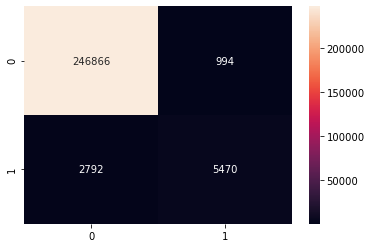

In [170]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
cm = confusion_matrix(Y_train, Y_train_pred)


sns.heatmap(cm, annot=True, fmt="d")

Confusion matrix on test set : 


<AxesSubplot:>

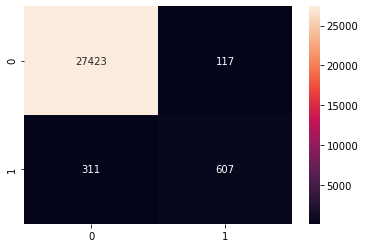

In [171]:
# graphique CM de test
print("Confusion matrix on test set : ")
cm = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

<AxesSubplot:>

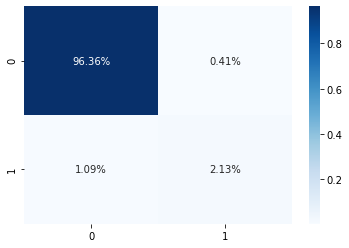

In [172]:
# graphique cm de test en %
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')


In [103]:

X_train

array([[-0.91458053, -1.4767432 , -0.85939501],
       [-0.30994956, -1.4767432 , -0.85939501],
       [-0.06809718,  0.67716581,  0.63639894],
       ...,
       [ 0.05282902, -1.4767432 , -1.1585538 ],
       [-0.43087576, -1.4767432 ,  1.23471652],
       [ 0.65745999,  0.67716581,  0.93555773]])

In [104]:
len(X_train)

256122

In [105]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [107]:
len(Y_train)

256122

In [108]:
classifier.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [109]:
X

,age,new_user,total_pages_visited
0,22,1,2
1,21,1,3
2,20,0,14
3,23,1,3
4,28,1,3
...,...,...,...
284575,36,1,1
284576,31,1,2
284577,41,1,5
284578,31,1,4


In [110]:
type(X)

pandas.core.frame.DataFrame

In [111]:
Y

0         0
1         0
2         1
3         0
4         0
         ..
284575    0
284576    0
284577    0
284578    0
284579    0
Name: converted, Length: 284580, dtype: int64

In [122]:
type(Y)

numpy.ndarray


# Train best classifier on all data and use it to make predictions on X_without_labels

In [173]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)
type(X)
type(Y)
classifier.fit(X,Y)



LogisticRegressionCV()

In [174]:
data_without_labels = pd.read_csv('conversion_data_test.csv')
data_without_labels1=data_without_labels
data_without_labels1

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


In [175]:
# Read data without labels
#data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels1.shape)


Prediction set (without labels) : (31620, 5)


In [176]:


# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)


feature_list=['age','new_user','total_pages_visited']

X_without_labels = data_without_labels1[feature_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Convert pandas DataFrames to numpy arrays...
...Done
[[28  0 16]
 [22  1  5]
 [32  1  1]
 [32  1  6]
 [25  0  3]]


In [177]:
# WARNING : PUT HERE THE SAME PREPROCESSING AS FOR YOUR TEST SET
# CHECK YOU ARE USING X_without_labels
print("Encoding categorical features and standardizing numerical features...")

X_without_labels = featureencoder.transform(X_without_labels)
print("...Done")
print(X_without_labels[0:5,:])

Encoding categorical features and standardizing numerical features...
...Done
[[-0.30994956 -1.4767432   3.32882805]
 [-1.03550673  0.67716581  0.03808136]
 [ 0.17375521  0.67716581 -1.1585538 ]
 [ 0.17375521  0.67716581  0.33724015]
 [-0.67272814 -1.4767432  -0.56023622]]


In [178]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_[AlainS-model4].csv', index=False)


In [179]:
y=classifier.predict(X_without_labels)


In [180]:
sum(y)

803

In [181]:
len(y)

31620

In [182]:
print(Y_predictions)

       converted
0              1
1              0
2              0
3              0
4              0
...          ...
31615          0
31616          0
31617          0
31618          0
31619          0

[31620 rows x 1 columns]


In [183]:
print(data)

{'converted': array([1, 0, 0, ..., 0, 0, 0])}


In [184]:
sum(data['converted'])

803